In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from typing import Optional
from python2verilog import verilogify, context_to_text_and_file

In [2]:
def make_visual(generator_inst, directory: Optional[str] = None):
    """
    Any iterable of tuples where the tuples are of length > 0 will work.
    Visualizes the first 3 elements of each tuple as (x, y, colour)
    """

    # Generate the data using the generator function
    data_triple_list = []

    for idx, yields in enumerate(generator_inst):
        if isinstance(yields, int):
            yields = (yields,)
        if len(yields) >= 3:
            data_triple_list.append(yields[:3])
        elif len(yields) >= 2:
            data_triple_list.append((*yields[:2], 1))
        else:
            data_triple_list.append((yields[0], idx, 1))

    data_triple = np.array(data_triple_list)

    try:
        height = max(data_triple[:, 0])
        width = max(data_triple[:, 1])
        grid = np.zeros((int(height) + 1, int(width) + 1))
        for x_coord, y_coord, colour in data_triple:
            grid[x_coord, y_coord] = colour

        # Create the pixel-like plot
        plt.imshow(grid)

        # Set labels and title
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Pixel-like Plot")

        # Add color bar
        cbar = plt.colorbar()
        cbar.set_label("Z")

        plt.gca().invert_yaxis()

        # Show the plot
        plt.show()
        if directory: 
            plt.savefig(directory)

        plt.clf()
        plt.cla()
        plt.close()
        
    except IndexError as e:
        print(
            f"Skipping make_visual for {str(generator_inst)} due to negative outputs {e}",
        )

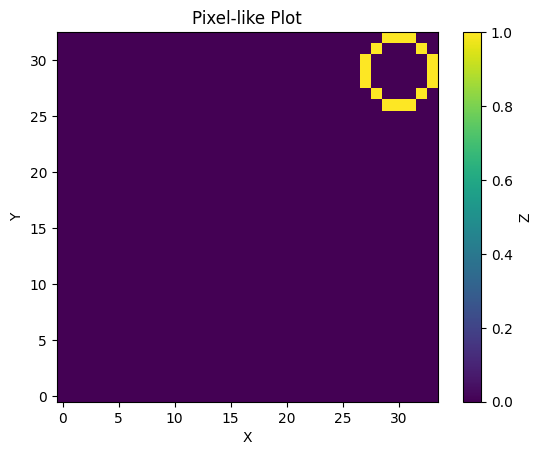

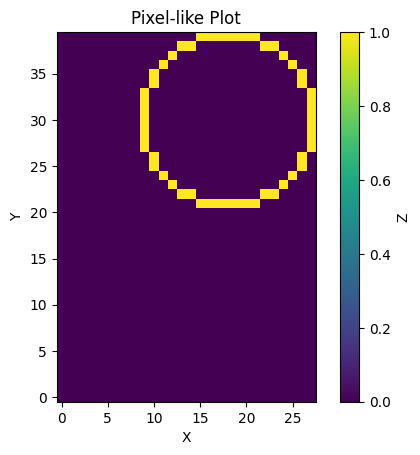

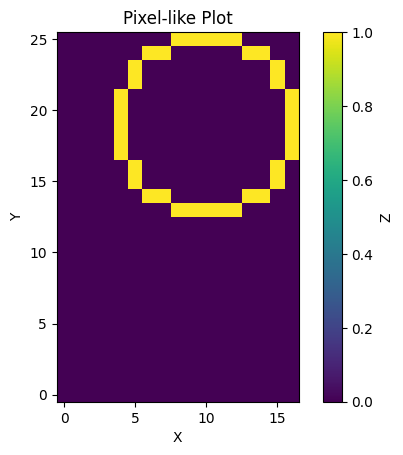

module draw_circle (
    input wire signed [31:0] centre_x,
    input wire signed [31:0] centre_y,
    input wire signed [31:0] radius,
    input wire _start,
    input wire _clock,
    input wire _reset,
    output reg signed [31:0] _0,
    output reg signed [31:0] _1,
    output reg _ready,
    output reg _valid
);
    localparam _state_0_while_1 = 0;
    localparam _state_0_while_5 = 1;
    localparam _state_0_while_4 = 2;
    localparam _state_0_while_3 = 3;
    localparam _state_0_while_2 = 4;
    localparam _state_0_while_8 = 5;
    localparam _state_0_while_6 = 6;
    localparam _state_3 = 7;
    localparam _state_0_while_7 = 8;
    localparam _statelmaoready = 9;
    reg signed [31:0] _crit;
    reg signed [31:0] _offset_x;
    reg signed [31:0] _offset_y;
    reg signed [31:0] _state;
    reg signed [31:0] _centre_x;
    reg signed [31:0] _centre_y;
    reg signed [31:0] _radius;
    always @(posedge _clock) begin
        _valid <= 0;
        _ready <= 0;
        _0 <= $signed

In [12]:
namespace = {}

@verilogify(
    namespace=namespace,
    # write=True,
    # overwrite=True,
    # module_output="./draw_circle.sv",
    # testbench_output="./draw_circle_tb.sv",
)
def draw_circle(centre_x, centre_y, radius):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1

for _ in range(3):     
    make_visual(draw_circle(random.randint(10, 30), random.randint(10, 30), random.randint(1, 10)))

module, testbench = context_to_text_and_file(namespace[draw_circle])

print(module)
print(testbench)